# Tinanic Dataset


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plotting

In [109]:
df = pd.read_csv('train.csv')


0.18890814558058924

Text(0,0.5,'Percent Died')

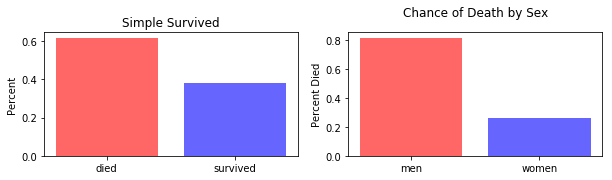

In [141]:
color = ['r', 'b', 'g']

fig = plt.figure(figsize = (10,5))
plt.subplot2grid((2,2), (0,0))
plt.title("Simple Survived")
plt.bar(df.Survived.unique(), df.Survived.value_counts(normalize = True), alpha = 0.6, color = color)
plt.xticks(np.arange(2) , ['died', 'survived'])
plt.ylabel('Percent') 

plt.subplot2grid((2,2), (0,1))
plt.title("Chance of Death by Sex", y=1.08)
menWomen = [df.Survived[df['Sex'] == 'male'].value_counts(normalize = True)[0],
            df.Survived[df['Sex'] == 'female'].value_counts(normalize = True)[0]]
menWomenLable = ['men', 'women']
plt.bar(menWomenLable, menWomen, alpha = 0.6, color = color)
plt.ylabel('Percent Died') 





Text(0,0.5,'Percent Died')

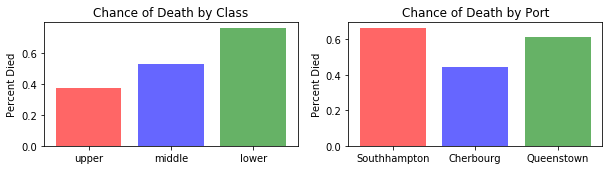

In [146]:
fig = plt.figure(figsize = (10,5))
plt.subplot2grid((2,2), (0,0))
plt.title("Chance of Death by Class")
classLevel = [df.Survived[df['Pclass'] == 1].value_counts(normalize = True)[0],
            df.Survived[df['Pclass'] == 2].value_counts(normalize = True)[0],
            df.Survived[df['Pclass'] == 3].value_counts(normalize = True)[0]]
classLable = ['upper', 'middle', 'lower']
plt.bar(classLable, classLevel, alpha = 0.6, color = color)
plt.ylabel('Percent Died')

plt.subplot2grid((2,2), (0,1))
plt.title("Chance of Death by Port")
classLevel = [df.Survived[df['Embarked'] == 'S'].value_counts(normalize = True)[0],
            df.Survived[df['Embarked'] == 'C'].value_counts(normalize = True)[0],
            df.Survived[df['Embarked'] == 'Q'].value_counts(normalize = True)[0]]
classLable = ['Southhampton', 'Cherbourg', 'Queenstown']
plt.bar(classLable, classLevel, alpha = 0.6, color = color)
plt.ylabel('Percent Died') 

## Baseline Model:
Rich, Female, and Young


Baseline count: 
if Woman or Children
and Wealthy
    Then Survive
   
Else: 
    Die

In [2]:
def baseLine(row):
    if row.Pclass == 1:
        survived = 1
    elif row.Sex == 'female':
        survived = 1
    elif row.Age <= 12:
        survived = 1
    else:
        survived = 0
    return str(row.PassengerId) + " " + str(survived)

def baselinePredict(X):
    predict = X.apply(baseLine, axis = 1)
    return  pd.DataFrame(predict.str.split(' ',1).tolist(),
                         columns = ['PassengerId','Predict']).apply(pd.to_numeric)

In [3]:
def score(test):
    
   
    #baseline Score
    predict = baselinePredict(test)
    
    merged = pd.merge(test,predict)
    answers = pd.read_csv('gender_submission.csv')
    final = pd.merge(merged, answers, on = 'PassengerId')
    print((final.Survived == final.Predict * 1).sum()/ merged.shape[0])
    

In [74]:
def ageSet(self,row):
    if row.Age <= 18:
        age = 0
    elif row.Age <= 35:
        age = 1
    elif row.Age <= 50:
        age = 2
    else:
        age = 3
    return age


In [76]:
def aloneSet(self,row):
#TODO Create status for if have parent or child
#If traveling alone then alone = 1
    alone = 0
    if int(row.SibSp) == 0 and int(row.Parch) == 0:
        alone = 1
    return alone

In [77]:
def ticketPriceSet(self,row):
    index = row.Pclass
    if row.Fare > row.meanTicketPrice:
        ticketPrice = 1
    else:
        ticketPrice = 0
    return ticketPrice

In [80]:

def titanicClean(self,df, ageContinuous = False):
    #made id an index
    df = df.set_index('PassengerId')

    df = df.drop([])

    # replace age with child young adult elder
    # if age is unknown Elder
    print(df.columns)
    if ageContinuous:
        df.Age = df.Age.fillna(method = 'bfill')
    else:
        df['AgeClass'] = df.apply(self.ageSet, axis = 1)
        df = df.drop(['Age'], axis = 1)
    #Create alone
    df['Alone'] = df.apply(self.aloneSet, axis = 1)


    #find mean of fare
    for i in np.unique(df['Pclass']):
        self.meanPrice.append(df.Fare[df['Pclass'] == int(i)].mean(axis = 0))
    self.meanPrice = [0] + self.meanPrice

    #create column of array out of mean array
    #need to do this b/c apply function is weird
    tempTicketMean = []
    for index, row in df.iterrows():
        tempTicketMean.append(self.meanPrice[row.Pclass])    

    #Create ticket Price Column
    df['meanTicketPrice'] = tempTicketMean
    df['ticketPrice'] = df.apply(self.ticketPriceSet, axis = 1)

    df.Embarked = df.Embarked.fillna(value = 'S')
    #Change female to int
    #df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})


    #df['Embarked'] = df['Embarked'].map({'Q': 1, 'S': 0, 'C':2})
    #drop uneeded columns
    df = df.drop(['Name','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'meanTicketPrice'],axis = 1)

    # df = pd.get_dummies(data = df, columns=['Pclass', 'AgeClass', 'Embarked'])

    return df

In [82]:

df = pd.read_csv('train.csv')
df = clean.titanicClean(df, ageContinuous = True)
df

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Pclass,Sex,Age,Embarked,Alone,ticketPrice
PassengerId,,,,,,,
1,0,3,male,22.0,S,0,0
2,1,1,female,38.0,C,0,1
3,1,3,female,26.0,S,1,0
4,1,1,female,35.0,S,0,1
5,0,3,male,35.0,S,1,0
6,0,3,male,54.0,Q,1,0
7,0,1,male,54.0,S,1,1
8,0,3,male,2.0,S,0,0
9,1,3,female,27.0,S,0,0
